In [22]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from plot_utils import plot_event_history

In [23]:
sns.set_style("whitegrid")

In [24]:
mab_log = pd.read_csv("mab_log.csv")
mab_arms = pd.read_csv("mab_arms.csv")
event_history = pd.read_csv("event_history.csv", index_col=False).dropna().sort_values(by="event")
quit_sold = event_history.loc[event_history.event.isin(["quit", "sold"])]
mab_arms.group = mab_arms.group.replace({0: "Medium", 1: "High", 2: "Low"})


# mab_log.config_id.replace({0:"UCB", 1:"Epsilon", 2:"Decaying Epsilon"}, inplace=True)
# mab_arms.config_id.replace({0:"UCB", 1:"Epsilon", 2:"Decaying Epsilon"}, inplace=True)
# mab_arms.rename(columns={"config_id": "Algorithm"}, inplace=True)


In [25]:
mab_res = mab_log.groupby(["config_id", "run_id"]).agg(
    total_reward=('reward', 'sum'),
).reset_index()

In [ ]:
# Calculate sliding window mean for total rewards by config_id
window_size = 5  # You can adjust this value based on your preference

# Create a new dataframe with the sliding window means
sliding_means = mab_res.sort_values(['config_id', 'run_id']).groupby('config_id').apply(
    lambda x: x.assign(sliding_mean=x['total_reward'].rolling(window=window_size, min_periods=1).mean())
).reset_index(drop=True)

# Plot the sliding window means
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=sliding_means,
    x='run_id',
    y='sliding_mean',
    hue='config_id',
)

plt.xlabel('Iteration')
plt.ylabel('Reward')
plt.legend(title='Algorithm')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(
    x="run_id",
    y="total_reward",
    data=mab_res,
    hue="config_id",
)

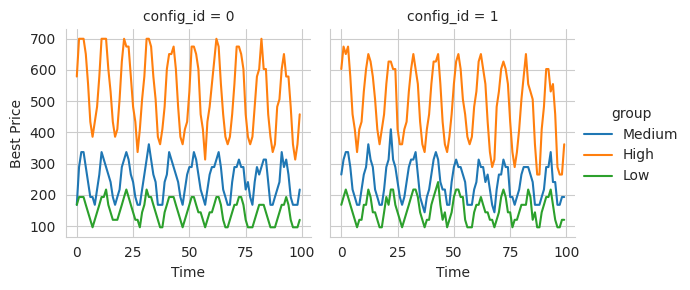

In [28]:
g = sns.FacetGrid(mab_arms, col="config_id", hue="group")
g.map(sns.lineplot, "t", "best_price")
g.add_legend()
g.set_axis_labels("Time", "Best Price")

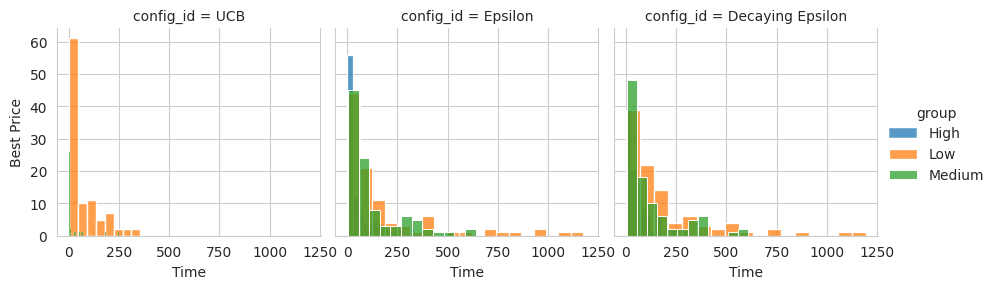

In [59]:
g = sns.FacetGrid(mab_arms, col="config_id", hue="group")
g.map(sns.histplot, "num_pulls")
g.add_legend()
g.set_axis_labels("Time", "Best Price")

In [ ]:
mab_arms.groupby('config_id').agg(
    total_pulls=('num_pulls', 'sum'),
    total_arms=('t', 'count'),
)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.lineplot(
    data=mab_arms.loc[mab_arms.run_id == 1],
    x="t",
    y="best_price",
    hue="group",
    ax=ax,
)

ax.set_ylabel("Best Price")

In [ ]:
quit_sold.loc[event_history.run_id == 1].groupby(["actual_group", "predicted_group"]).agg(
    count=("run_id", "count"),
)

In [ ]:
event_history.loc[event_history.run_id == 1].groupby(["actual_group", "predicted_group", "event"]).agg(
    count=("run_id", "count"),
)

In [ ]:
fig, axs = plt.subplots(1,1, figsize=(9, 9))
plot_event_history(axs, event_history.loc[event_history.run_id == 0])
# plot_event_history(axs[1], event_history.loc[event_history.run_id == 3])

In [ ]:
sns.lineplot(
    data=quit_sold.loc[event_history.run_id == 3],
    x="t",
    y="price",
    hue="actual_group"
)
sns.scatterplot(
    data=quit_sold.loc[event_history.run_id == 3],
    x="t",
    y="adjusted_wtp",
    hue="actual_group",
    # shape='event'
)

In [ ]:
sns.scatterplot(
    data=quit_sold.loc[event_history.run_id == 3],
    x="customer",
    y="price",
    hue="event",
    # shape='event'
)

<Axes: xlabel='run_id', ylabel='total_reward'>

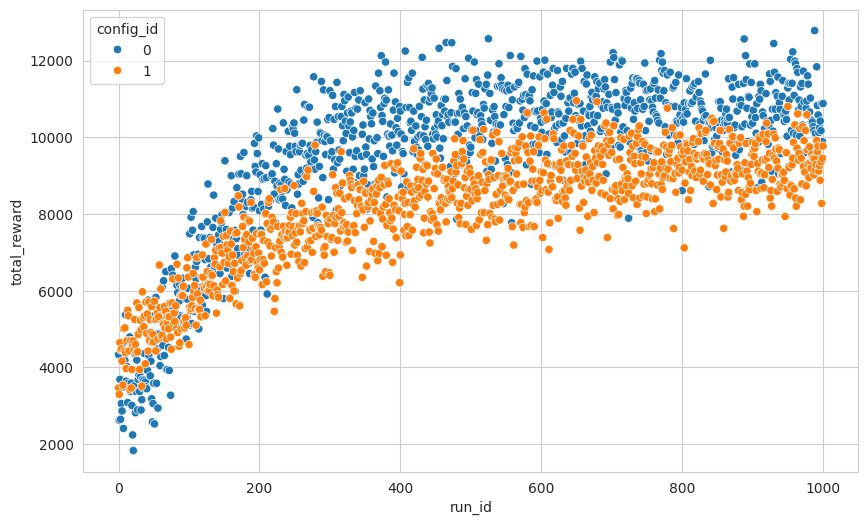

In [28]:
mab_res

,config_id,run_id,total_reward
0,0,0,2792
1,0,1,4216
2,0,2,3658
3,0,3,4358
4,0,4,1394
...,...,...,...
1997,1,996,10086
1998,1,997,9026
1999,1,998,9335
2000,1,999,9673


In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
sns.lineplot(
    data=mab_arms.loc[mab_arms.run_id == 0],
    x="t",
    y="best_price",
    hue="group",
    ax=axs[0],
)
sns.lineplot(
    data=mab_arms.loc[mab_arms.run_id == 1],
    x="t",
    y="best_price",
    hue="group",
    ax=axs[1],
)
axs[0].set_title("Acc = 1")
axs[1].set_title("Acc = 0.7")
axs[1].set_xlabel("Time")
axs[0].set_ylabel("Best Price")
axs[1].set_ylabel("Best Price")

In [11]:
reward_by_arm_over_time = mab_log.loc[mab_log.group == 1].groupby(["price", "run_id"]).agg(
    avg_reward=('reward', 'mean'),
).reset_index()

In [ ]:
sns.heatmap(
    data=reward_by_arm_over_time.pivot(
        index="price",
        columns="run_id",
        values="avg_reward"
    ).fillna(0),
    cmap="YlGnBu",
)

In [ ]:
sns.lineplot(
    data=reward_by_arm_over_time,
hue   ="price",
    y="avg_reward",
    x="run_id",
)